In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

In [3]:
dataset = pd.read_csv("./dataset.csv")

In [4]:
dataset.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
dataset.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [6]:
dataset.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Cocain       0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [7]:
df = dataset.copy()

In [8]:
columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Cocain', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']

In [9]:
from sklearn.preprocessing import LabelEncoder
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [10]:
for i in range(len(columns)):
    df.loc[((df[columns[i]]==0) | (df[columns[i]]==1)),columns[i]] = 'Non-user'
    df.loc[((df[columns[i]]==2) | (df[columns[i]]==3) | (df[columns[i]]==4) | (df[columns[i]]==5) | (df[columns[i]]==6)),columns[i]] = 'User'

In [11]:
count_of_users = []
count_of_non_users = []

In [12]:
for i in range(len(columns)):
    s = df.groupby([columns[i]])[columns[i]].count()
    count_of_users.append(s[1])
    count_of_non_users.append(s[0])

In [13]:
x=count_of_users
y=count_of_non_users
print(x)
print(y)

[1817, 679, 370, 769, 1848, 1265, 1850, 687, 191, 751, 212, 350, 762, 557, 417, 694, 1264, 6, 230]
[68, 1206, 1515, 1116, 37, 620, 35, 1198, 1694, 1134, 1673, 1535, 1123, 1328, 1468, 1191, 621, 1879, 1655]


In [14]:
for column in columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [15]:
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,1,1,0,0,0,0,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,1,0,0,1,1,1,1,1,0,0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,1,0,1,0,1,0,1,1,0,0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,1,0,0,1,1,0,1,1,0,0


In [16]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
target = ['Benzos']

X = df[features].values
y = df[target].values

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
X1 = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = 10, cv =None, direction ='backward').fit_transform(X, y)

c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [18]:
X1.shape

(1885, 10)

In [19]:
X1[0]

array([ 0.49788, -0.05921,  0.96082,  0.126  ,  0.31287, -0.57545,
       -0.91699, -0.00665, -0.21712, -1.18084])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,random_state=42,test_size=0.33)

KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6934189406099518


In [25]:
from sklearn import metrics
def plot_confusion_metrix(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [26]:
def report_performance(model):
    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, y_pred))
    plot_confusion_metrix(y_test, y_pred)



Confusion Matrix:
[[288  79]
 [112 144]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       367
           1       0.65      0.56      0.60       256

    accuracy                           0.69       623
   macro avg       0.68      0.67      0.68       623
weighted avg       0.69      0.69      0.69       623



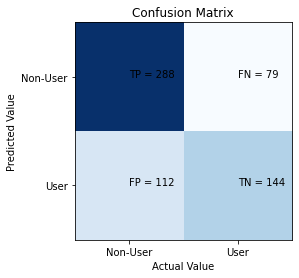

In [27]:
report_performance(knn) 

In [28]:
from sklearn.metrics import roc_curve,auc
def roc_curves(model):
    predictions_test = model.predict(X_test)
    metrics.plot_roc_curve(model, X_test, y_test) 

    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='-.')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-Curve')
    plt.legend(loc="lower right")
    plt.show()

In [29]:
#Sensitivity and Specificity
cm1 = metrics.confusion_matrix(y_test, y_pred)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity = ', sensitivity )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity = ', specificity)

precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision = ', precision)

Sensitivity =  0.784741144414169
Specificity =  0.5625
Precision =  0.72


c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


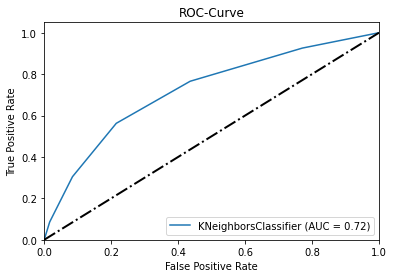

In [30]:
roc_curves(knn)

SVM Classifier

In [31]:
from sklearn.svm import SVC

In [32]:
svm = SVC(kernel="linear", C=1,random_state=42)
svm.fit(X_train, y_train.ravel())

SVC(C=1, kernel='linear', random_state=42)

In [33]:
y_pred = svm.predict(X_test)

In [34]:
print(accuracy_score(y_test,y_pred))

0.7078651685393258


In [35]:
#Sensitivity and Specificity
cm1 = metrics.confusion_matrix(y_test, y_pred)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity = ', sensitivity )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity = ', specificity)

precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision = ', precision)

Sensitivity =  0.7520435967302452
Specificity =  0.64453125
Precision =  0.7520435967302452




Confusion Matrix:
[[276  91]
 [ 91 165]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       367
           1       0.64      0.64      0.64       256

    accuracy                           0.71       623
   macro avg       0.70      0.70      0.70       623
weighted avg       0.71      0.71      0.71       623



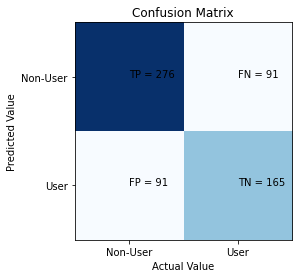

In [36]:
report_performance(svm) 

c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


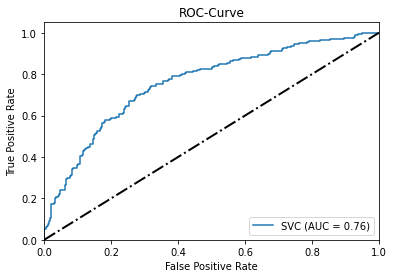

In [37]:
roc_curves(svm)

DECISION TREES

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

In [40]:
y_pred = dt.predict(X_test)

In [41]:
print(accuracy_score(y_test,y_pred))

0.6099518459069021


In [42]:
#Sensitivity and Specificity
cm1 = metrics.confusion_matrix(y_test, y_pred)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity = ', sensitivity )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity = ', specificity)

precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision = ', precision)

Sensitivity =  0.6730245231607629
Specificity =  0.51953125
Precision =  0.6675675675675675




Confusion Matrix:
[[247 120]
 [123 133]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       367
           1       0.53      0.52      0.52       256

    accuracy                           0.61       623
   macro avg       0.60      0.60      0.60       623
weighted avg       0.61      0.61      0.61       623



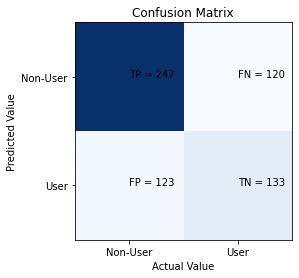

In [43]:
report_performance(dt) 

c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


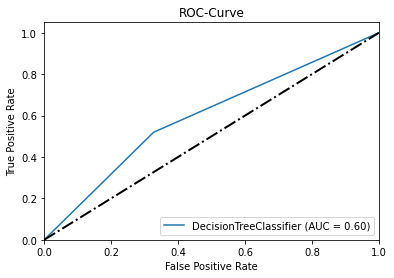

In [44]:
roc_curves(dt)

RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [47]:
y_pred = rf.predict(X_test)

In [48]:
print(accuracy_score(y_test,y_pred))

0.709470304975923


In [49]:
#Sensitivity and Specificity
cm1 = metrics.confusion_matrix(y_test, y_pred)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity = ', sensitivity )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity = ', specificity)

precision = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision = ', precision)

Sensitivity =  0.8038147138964578
Specificity =  0.57421875
Precision =  0.7301980198019802




Confusion Matrix:
[[295  72]
 [109 147]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       367
           1       0.67      0.57      0.62       256

    accuracy                           0.71       623
   macro avg       0.70      0.69      0.69       623
weighted avg       0.71      0.71      0.71       623



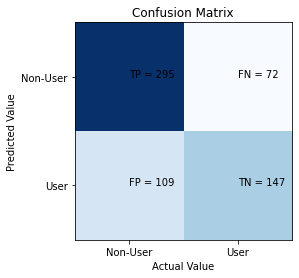

In [50]:
report_performance(rf) 

c:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


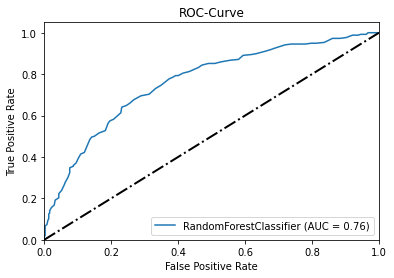

In [51]:
roc_curves(rf)